# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

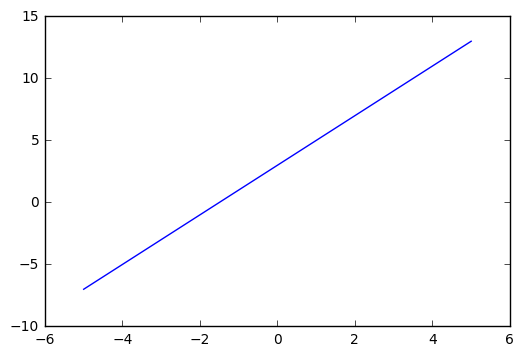

In [2]:
x = np.linspace(-5,5,num=100)
y = 2*x+3

plt.plot(x,y)
plt.show()

In [3]:
def f(w,b):
    """
    We will limit ourselves to a linear function
    """
    return w*x+b

def loss_function(w,b):
    """
    Loss function (squared error)
    Note that w and b are the ONLY variables
    """
    e = y - f(w,b)
    return np.sum(np.square(e))

Let us do a grid search over w and b for the smallest loss function value

In [4]:
loss_function(2,4)

100.0

In [5]:
loss_function(2,3)

0.0

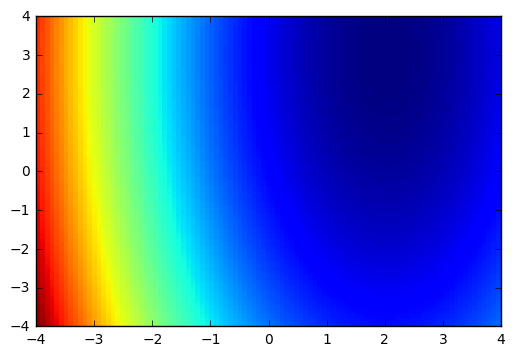

In [6]:
w_try = np.linspace(-4,4,num=100)
b_try = np.linspace(-4,4,num=100)

w_try, b_try = np.meshgrid(w_try,b_try)
e_obs = np.zeros((100,100))

for i in range(100):
    for j in range(100):
        e_obs[i,j] = loss_function(w_try[i,j],b_try[i,j])
        
plt.pcolormesh(w_try, b_try, e_obs)
plt.show()        

Algorithms try to be a bit smarter by following the gradients to find the minimum. Remember we can only influence the error via the weights (and bias) `w,b`.

## Maths (optional - no really)
\begin{align}
\mathcal{L} & = \sum_{i=1}^N (y_i-f(x_i,w,b))^2 \\
\frac{\delta\mathcal{L}}{\delta w} & = \sum_{i=1}^N 2(y_i-f(x_i,w,b))\frac{\delta f(x_i,w,b)}{\delta w} \\ 
& = \sum_{i=1}^N 2\xi_i\frac{\delta f(x_i,w,b)}{\delta w}
\end{align}
where $\xi_i$ is the error term $y_i-f(x_i,w,b)$ and 
$$
\frac{\delta f(x_i,w,b)}{\delta w} = x_i
$$

Similar expression can be found for $\frac{\delta\mathcal{L}}{\delta b}$ (exercise).

Finally the weights can be updated as $w_{new} = w_{current} - \gamma \frac{\delta\mathcal{L}}{\delta w}$ where $\gamma$ is a learning rate between 0 and 1.

In [7]:
from sklearn.linear_model import LinearRegression
LinearRegression?

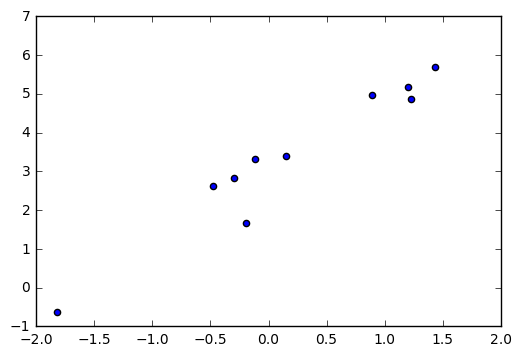

In [8]:
x = np.random.randn(10,1)
y = 2*x+3 + 0.5*np.random.randn(10,1)

plt.scatter(x,y)
plt.show()

In [9]:
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
model.coef_

array([[ 1.854051]])

In [11]:
model.intercept_

array([ 3.02652516])

In [12]:
model.predict(20)

array([[ 40.10754514]])

In [13]:
2*20+3

43

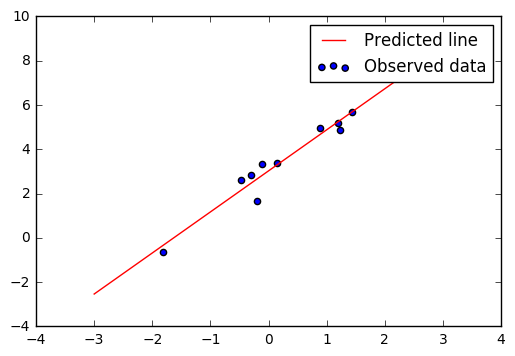

In [14]:
x_test = np.linspace(-3,3)
y_pred = model.predict(x_test[:,None])

plt.scatter(x,y)
plt.plot(x_test,y_pred,'r')
plt.legend(['Predicted line','Observed data'])
plt.show()

## A more complicated function

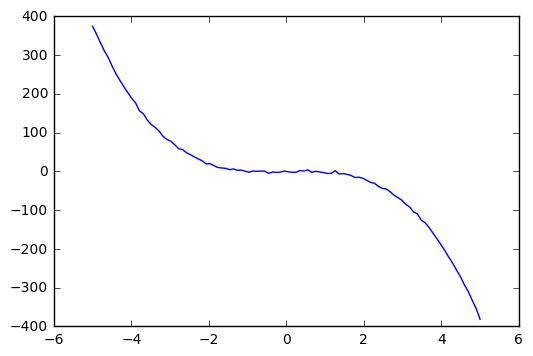

In [15]:
x = np.linspace(-5,5,num=100)[:,None]
y = -0.5 + 2.2*x - 3.1*x**3 + 2*np.random.randn(100,1)

plt.plot(x,y)
plt.show()

In [16]:
x_new = np.hstack([x,x**2,x**3,x**4])
x_new.shape

(100, 4)

In [17]:
model.fit(x_new,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
model.coef_

array([[ 2.35259305,  0.14505206, -3.11252908, -0.00678346]])

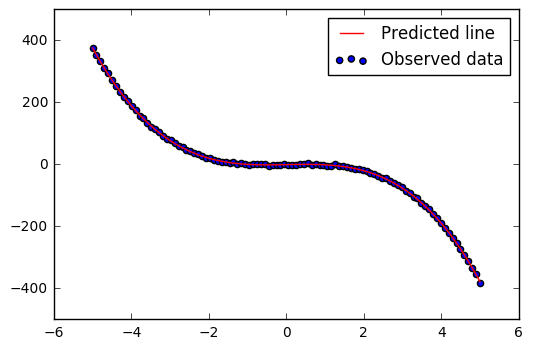

In [19]:
y_pred = model.predict(x_new)

plt.scatter(x,y)
plt.plot(x_new[:,0],y_pred,'r')
plt.legend(['Predicted line','Observed data'])
plt.show()

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4,include_bias=False)
x_new2 = poly.fit_transform(x)
x_new2[:2]

array([[  -5.        ,   25.        , -125.        ,  625.        ],
       [  -4.8989899 ,   24.00010203, -117.57625742,  576.00489747]])

In [21]:
x_new[:2]

array([[  -5.        ,   25.        , -125.        ,  625.        ],
       [  -4.8989899 ,   24.00010203, -117.57625742,  576.00489747]])

## Penalised Regression

We often do not want the coefficients/ weights to be too large. Hence we append the loss function with a penalty function to discourage large values of $w$.

\begin{align}
\mathcal{L} & = \sum_{i=1}^N (y_i-f(x_i,w,b))^2 + \alpha \sum_{j=1}^D w_j^2 + \beta \sum_{j=1}^D |w_j|
\end{align}

The values of $\alpha$ and $\beta$ are positive (or zero), with higher values enforcing the weights to be closer to zero.

In [67]:
# Generate the data
x = np.random.randn(500,100)
w_true = np.zeros((100,1))
idx = np.random.choice(100,10,replace=False)
w_true[idx] = np.random.randn(10,1)
# w_true[3] = 3.4
# w_true[45] = -2.1

e = np.random.randn(x.shape[0],1)
y = np.matmul(x,w_true) + e

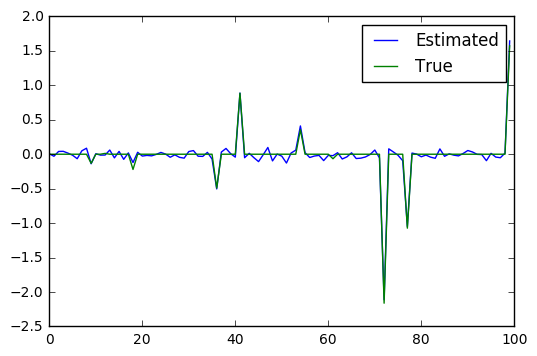

In [72]:
model = LinearRegression()
model.fit(x,y)

# plot the true vs estimated coeffiecients
plt.plot(np.arange(100),np.squeeze(model.coef_))
plt.plot(np.arange(100),w_true)
plt.legend(["Estimated","True"])
plt.show()

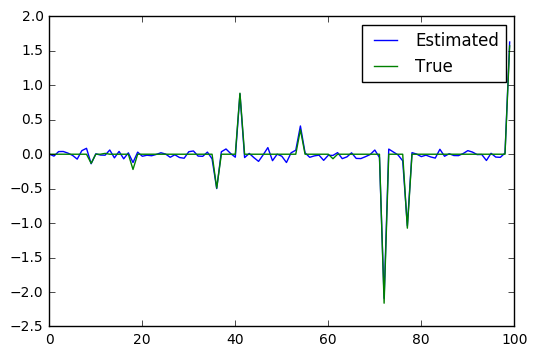

In [73]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=4.0,fit_intercept = False)
model.fit(x,y)

# plot the true vs estimated coeffiecients
plt.plot(np.arange(100),np.squeeze(model.coef_))
plt.plot(np.arange(100),w_true)
plt.legend(["Estimated","True"])
plt.show()

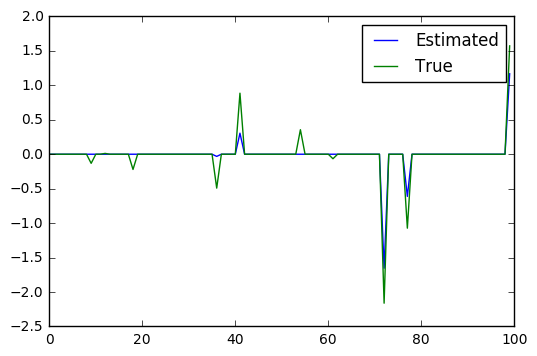

In [77]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.5,fit_intercept = False)
model.fit(x,y)

# plot the true vs estimated coeffiecients
plt.plot(np.arange(100),np.squeeze(model.coef_))
plt.plot(np.arange(100),w_true)
plt.legend(["Estimated","True"])
plt.show()